# ДЗ 1

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('2021-02-22_20-21-14.png')

In [3]:
img.shape

(687, 815, 3)

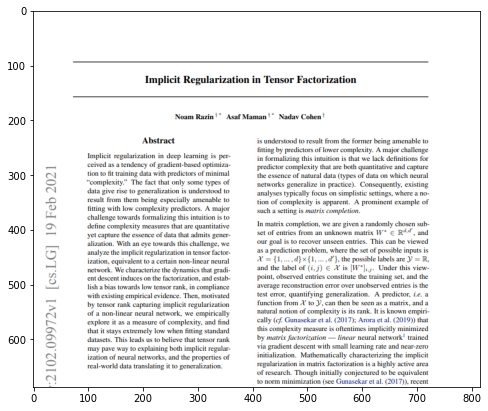

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [19]:
img[300:305, 300:305, :]

Array([[[255, 255, 238],
        [174,  93,  27],
        [ 21,  84, 165],
        [236, 255, 255],
        [255, 255, 245]],

       [[255, 255, 255],
        [253, 232, 189],
        [129,  77,  63],
        [ 86, 130, 161],
        [168, 154, 125]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [248, 236, 229],
        [233, 244, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

## Преобразуем в чёрно-белый и проинвертируем цвет текста и фона

In [24]:
img.shape[0]

687

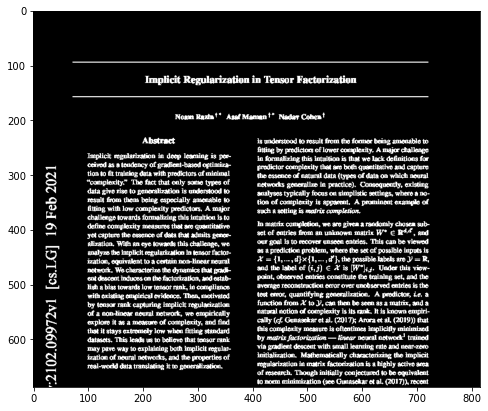

In [28]:
out_img = np.zeros(
    (img.shape[0],
     img.shape[1]), 
     dtype=np.float32)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if img[y, x, 0] < 250:
            out_img[y, x] = 1
        else:
            out_img[y, x] = 0
            
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

## Оконная обработка изображения (фильтрация) размытие

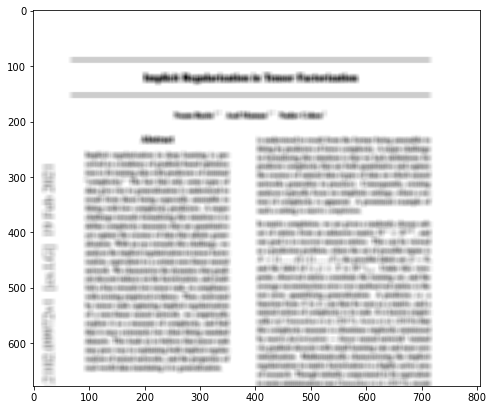

In [30]:
win_size = (11, 11) # размер окна

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

def my_filter(x):
    # Box blur
    return np.mean(x)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_filter(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

## Ищем горизонтали

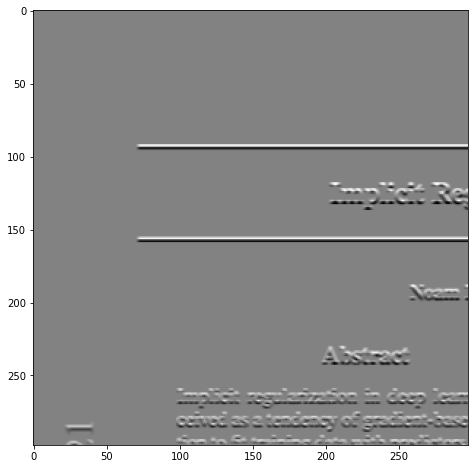

In [46]:
win_size = (3, 3) # размер окна

core = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

img_copy = np.copy(img[:300, :300, 0])
img_copy = img_copy.astype(np.float32) / 255.

out_img = np.zeros(
    (img_copy.shape[0] - win_size[0] + 1,
     img_copy.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

def hor_filter(x):
    return np.sum(core * x)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = hor_filter(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

## Ищем вертикали

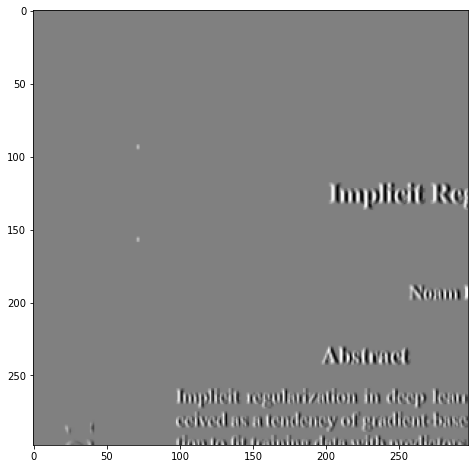

In [45]:
win_size = (3, 3) # размер окна

core = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)

img_copy = np.copy(img[:300, :300, 0])
img_copy = img_copy.astype(np.float32) / 255.

out_img = np.zeros(
    (img_copy.shape[0] - win_size[0] + 1,
     img_copy.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

def ver_filter(x):
    return np.sum(core * x)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = ver_filter(x)
        
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()